In [6]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
# import missingno as msno

## Read CSV

In [7]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Step 2: Code for printing the first 5 rows of the dataset

In [8]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Write your code for printing summary statistics of the dataset

In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

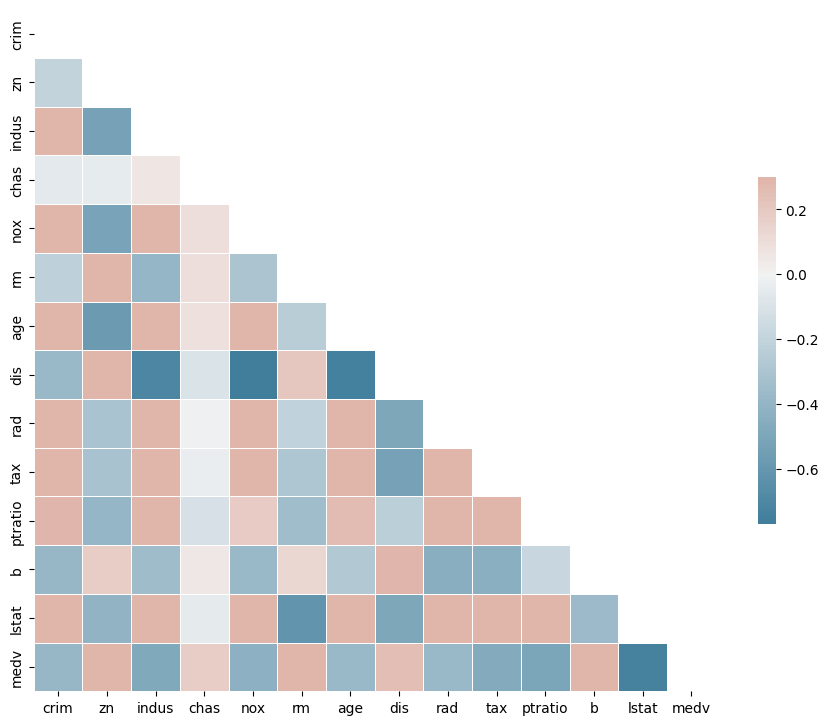

In [10]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Write your code to check for missing values

In [11]:
print(df.isnull().sum())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


## Step 3: Data Visualization

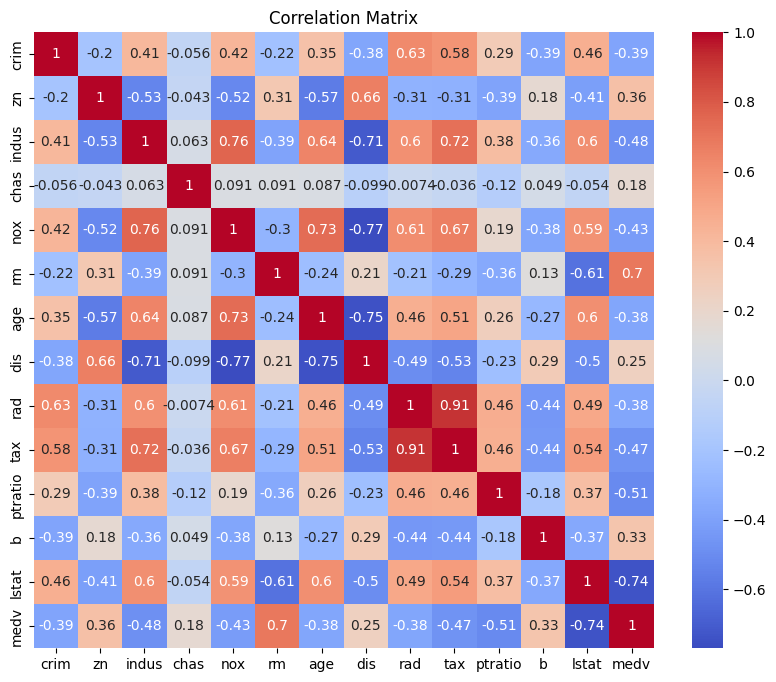

In [12]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
# Saving the heatmap image
plt.savefig('correlation_heatmap.png') # Save heatmap as an image
plt.show()

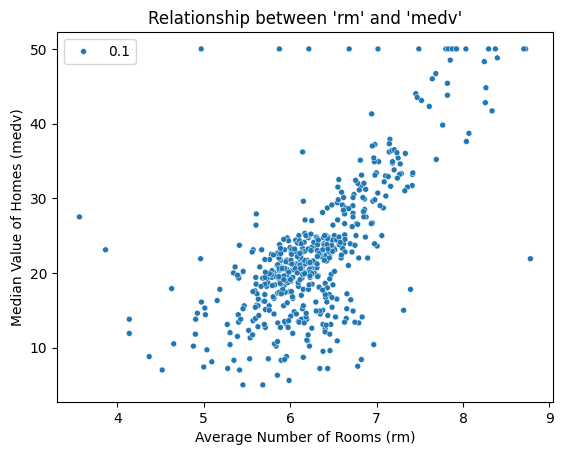

In [13]:
sns.scatterplot(x='rm', y='medv', size= 0.1, data=df)
plt.title("Relationship between 'rm' and 'medv'")
plt.xlabel("Average Number of Rooms (rm)")
plt.ylabel("Median Value of Homes (medv)")
plt.show()


### Step 4: Prepare Data for Linear Regression

In [14]:
# Write your code after reading about data splitting using train_test_split and implement it here.

X_train, X_test, y_train, y_test = train_test_split(
    df[["rm"]], df["medv"], test_size=0.33, random_state=42)


In [15]:
# Write your code for implementing the Linear Regression model
# Linear Regression Model
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)


LinearRegression()

### Step 6: Make predictions on the test set

In [16]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)



### Step 7: Evaluate the Model

In [17]:
# Write your code for evaluating model performance
# Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")


Mean Squared Error: 39.09
R-squared: 0.48


### Step 8: Visualize the Linear Regression Results

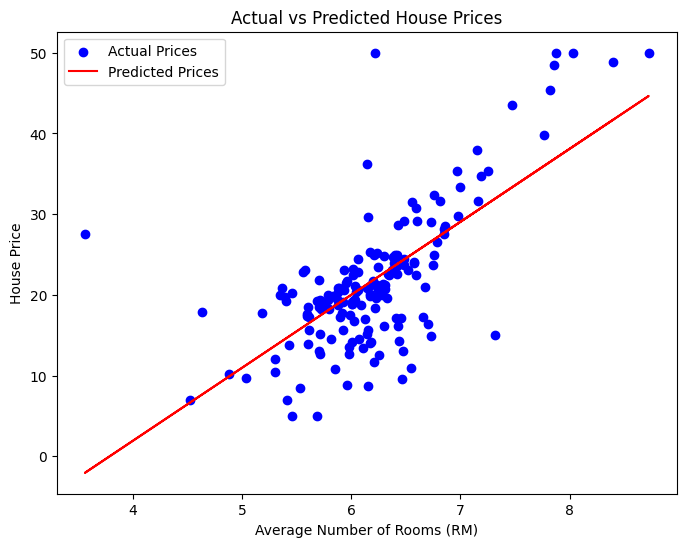

In [18]:
# Assuming predictions are made (y_pred) and actual data is y_test
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred_lr, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price')
plt.legend()

In [19]:
# Saving the actual vs predicted price plot as an image
plt.savefig('actual_vs_predicted_prices.png') # Save the result image
plt.show()

<Figure size 640x480 with 0 Axes>

## Random Forest Regression

Random Forest Performance:
Mean Squared Error (MSE): 47.09
R-squared (R²): 0.38


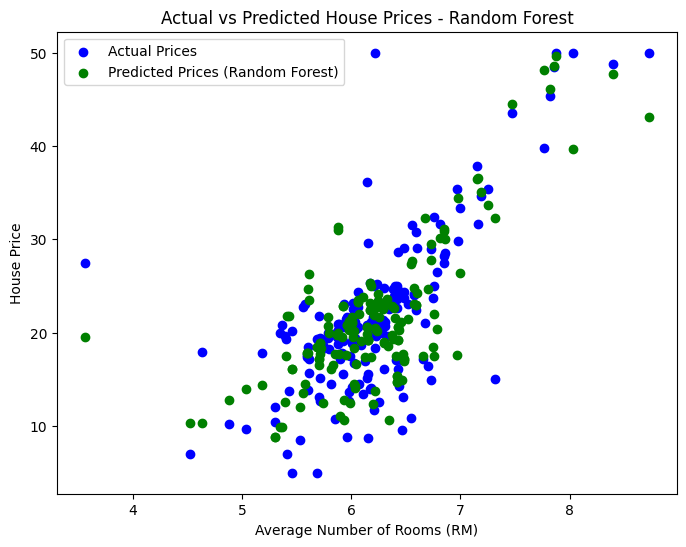

In [20]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")

# Plot Random Forest results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred_rf, color='green', label='Predicted Prices (Random Forest)')
plt.title('Actual vs Predicted House Prices - Random Forest')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price')
plt.legend()
plt.show()

### ML FLow

In [21]:
# Define models for regression
models = [
    (
        "Linear Regression", 
        LinearRegression(), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "Random Forest", 
        RandomForestRegressor(n_estimators=100, random_state=42), 
        (X_train, y_train),
        (X_test, y_test)
    )
]

In [ ]:
mlflow.set_experiment("LR_RF")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
#mlflow.set_tracking_uri("C:/Users/DELL/OneDrive/Documents/GitHub/Mlops_assignment/Assignment_4/mlruns")

with mlflow.start_run():
    mlflow.log_params(params)

2024/11/12 17:01:02 INFO mlflow.tracking.fluent: Experiment with name 'LR_RF' does not exist. Creating a new experiment.
2024/11/12 17:01:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run bright-snake-368 at:  http://127.0.0.1:5000/#/experiments/297133268658188670/runs/0c053d3e2298421babfbdd4dda417f1f.
2024/11/12 17:01:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at:  http://127.0.0.1:5000/#/experiments/297133268658188670.


NameError: name 'params' is not defined

In [25]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(df[["rm"]], df["medv"], test_size=0.33, random_state=42)

# Define models for regression
models = [
    (
        "Linear Regression", 
        LinearRegression(), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "Random Forest", 
        RandomForestRegressor(n_estimators=100, random_state=42), 
        (X_train, y_train),
        (X_test, y_test)
    )
]

# Set up MLflow experiment
mlflow.set_experiment("LR_RF")
mlflow.set_tracking_uri("http://127.0.0.1:8080")
# List to store performance reports
reports = []

# Train and log each model
for model_name, model, train_set, test_set in models:
    X_train, y_train = train_set
    X_test, y_test = test_set
    
    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics for regression
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Log metrics, parameters, and models in MLflow
    with mlflow.start_run(run_name=model_name):        
        # Log model name as a parameter
        mlflow.log_param("model", model_name)
        
        # Log regression metrics
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("r2_score", r2)
        
        # Infer the model signature
        signature = infer_signature(X_train, y_pred)
        
        # Log the model with its metadata
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"{model_name}_model",
            signature=signature,
            input_example=X_train.head()
        )

        # Append report to list for later inspection if needed
        reports.append({"model_name": model_name, "mse": mse, "r2_score": r2})

# Print out the performance reports for each model
for report in reports:
    print(f"Model: {report['model_name']}, MSE: {report['mse']:.2f}, R²: {report['r2_score']:.2f}")


MlflowException: API request to http://127.0.0.1:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=LR_RF (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000027DC5046C00>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))